# Student Database

In [17]:
%matplotlib inline
# Important for using matplotlib w/ Ipython Notebook
import PIL
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import graphviz as gv

import numpy as np

import mysql.connector
import pandas as pd

import sys
import os
import random
import math
from __future__ import division

In [3]:
conn = mysql.connector.connect (host = "localhost",
                                user = "root", passwd = "cs126")

CreateDB="create database IF NOT EXISTS students"
DropDB="drop database IF EXISTS students"
ShowDB="show databases"
cursor = conn.cursor()
cursor.execute(DropDB)
cursor.execute(ShowDB)
data = pd.DataFrame(cursor.fetchall())
print;print "Before Create";print data
cursor.execute(CreateDB)
cursor.execute(ShowDB)
data = pd.DataFrame(cursor.fetchall())
print;print "After Create";print data
conn.commit()
conn.close()


Before Create
                    0
0  information_schema
1                  c9
2              graphs
3              iris2d
4             mnistv2
5               mysql
6  performance_schema
7          phpmyadmin

After Create
                    0
0  information_schema
1                  c9
2              graphs
3              iris2d
4             mnistv2
5               mysql
6  performance_schema
7          phpmyadmin
8            students


In [4]:
d=["Person", "Transcript", "JobHistory", "Phone", "PhoneLog", "zips", "Instructors", "Courses"]
conn = mysql.connector.connect (host = "localhost",
                                user = "root", passwd = "cs126", db="students")
cursor = conn.cursor()
for t in d:
    q="drop table if exists " + t
    print q
    cursor.execute(q)


drop table if exists Person
drop table if exists Transcript
drop table if exists JobHistory
drop table if exists Phone
drop table if exists PhoneLog
drop table if exists zips
drop table if exists Instructors
drop table if exists Courses


In [5]:
c=[]
c.append("create table if not exists Person(pid int primary key, lName varchar(20), "
         "fName varchar(20), gender char(1), birth date)")
c.append("create table if not exists Transcript(sid int, semester varchar(20), "
         "year int, CourseID varchar(20), CourseDesc varchar(20), units int, grade char(2))")

c.append("create table if not exists JobHistory (pid int, jobtitle varchar(40), company varchar(40), "
         "startdate date, enddate date, description varchar(512))")

# Phone number tables
c.append("create table if not exists Phone(pid int, ptype int, pnumber char(10), startdate date, enddate date)")
c.append("create table if not exists PhoneLog(initnumber char(10), destnumber char(10), starttime time, startdate date,"
   "endtime time, enddate date)")
c.append("create table if not exists zips(zipcode char(3) primary key, zipstate char(2), zipdesc varchar(132))")

# Instructors
c.append("create table if not exists Instructors(pid int, semester varchar(20), year int, cid int)")
c.append("create table if not exists Courses(cid int primary key auto_increment, CourseID varchar(20), "
   "CourseDesc varchar(20), units int) auto_increment=100")

conn = mysql.connector.connect (host = "localhost",
                                user = "root", passwd = "cs126", db="students")
cursor = conn.cursor()
for create in c:
    print create
    cursor.execute(create)

conn.commit()
conn.close()

create table if not exists Person(pid int primary key, lName varchar(20), fName varchar(20), gender char(1), birth date)
create table if not exists Transcript(sid int, semester varchar(20), year int, CourseID varchar(20), CourseDesc varchar(20), units int, grade char(2))
create table if not exists JobHistory (pid int, jobtitle varchar(40), company varchar(40), startdate date, enddate date, description varchar(512))
create table if not exists Phone(pid int, ptype int, pnumber char(10), startdate date, enddate date)
create table if not exists PhoneLog(initnumber char(10), destnumber char(10), starttime time, startdate date,endtime time, enddate date)
create table if not exists zips(zipcode char(3) primary key, zipstate char(2), zipdesc varchar(132))
create table if not exists Instructors(pid int, semester varchar(20), year int, cid int)
create table if not exists Courses(cid int primary key auto_increment, CourseID varchar(20), CourseDesc varchar(20), units int) auto_increment=100


In [6]:
d=[]
d.append("delete from Person")
d.append("delete from Transcript")
d.append("delete from Instructors")
d.append("delete from JobHistory")
d.append("delete from Courses")
conn = mysql.connector.connect (host = "localhost",
                                user = "root", passwd = "cs126", db="students")
cursor = conn.cursor()
for delete in d:
    print delete
    cursor.execute(delete)

conn.commit()
conn.close()

delete from Person
delete from Transcript
delete from Instructors
delete from JobHistory
delete from Courses


In [7]:
i1="insert into Transcript values (%s, %s, %s, %s, %s, %s, %s)"
transcriptData = pd.read_csv("StudentDB.druby.csv",header=None)
conn = mysql.connector.connect (host = "localhost",
                                user = "root", passwd = "cs126", db="students")
cursor = conn.cursor()
cursor.executemany(i1,transcriptData.as_matrix())

conn.commit()
conn.close()

In [8]:
q1="select * from Transcript"
conn = mysql.connector.connect (host = "localhost",
                                user = "root", passwd = "cs126", db="students")
cursor = conn.cursor()
transcriptData = pd.read_sql(q1, con=conn)
print transcriptData
conn.close()

    sid semester  year    CourseID          CourseDesc  units grade
0    50     Fall  1980   English 1         Composition      3     B
1    50     Fall  1980     Chem 1A       Gen Qual Anal      5     C
2    50     Fall  1980     Math 20     Intro Comp Prog      2     A
3    50     Fall  1980     Math 75     Math Analysis I      4     A
4    50     Fall  1980     Hist 11    Amer Hst to 1865      3     A
5    50   Spring  1981       QM 64  Compu Lang - COBOL      3     A
6    50   Spring  1981      Phil 1        Into to Phil      4     B
7    50   Spring  1981      Chem 8       Elem Org Chem      3     C
8    50   Spring  1981     Math 76    Math Analysis II      4     B
9    50   Spring  1981    Math 114     Discrete Struct      3     B
10   50     Fall  1981    Art H 20        Modern World      3     B
11   50     Fall  1981      Fin 34  Personal Investing      3     A
12   50     Fall  1981     Math 77       Math Anal III      0     F
13   50     Fall  1981    Math 107   Intro Prob 

In [9]:
i1="insert into Person values (%s, %s, %s, %s, %s)"
data = pd.read_csv("names.csv",header=None)
conn = mysql.connector.connect (host = "localhost",
                                user = "root", passwd = "cs126", db="students")
cursor = conn.cursor()
cursor.executemany(i1,data.as_matrix())

conn.commit()
conn.close()

In [10]:
q1="select count(*) from Person"
conn = mysql.connector.connect (host = "localhost",
                                user = "root", passwd = "cs126", db="students")
cursor = conn.cursor()
data = pd.read_sql(q1, con=conn)
conn.close()

print data

   count(*)
0      1000


In [11]:
i=[]
i.append("insert into Person(pid, fName, lName, gender, birth) value (50, 'David', 'Ruby', 'M', '1962-10-30')")
# Courses Table
i.append("insert into Courses (CourseID, CourseDesc, units) (select distinct CourseID, CourseDesc, units from Transcript)")

# Instructor Info
i.append("insert into Person(pid, fName, lName, gender, birth) value (10280, 'Harold', 'Haslam', 'M', '1969-08-08')")
i.append("insert into Person(pid, fName, lName, gender, birth) value (10250, 'Chi-Dak Ngai (Grace)', 'Yeung', 'F', '1970-07-07')")

i.append("insert into Person(pid, fName, lName, gender, birth) value (10260, 'Walt', 'Read', 'M', '1956-06-06')")
i.append("insert into Person(pid, fName, lName, gender, birth) value (10270, 'Noal', 'Harbertson', 'M', '1956-06-06')")
i.append("insert into Person(pid, fName, lName, gender, birth) value (10290, 'Henderson', 'Yeung', 'M', '1956-06-06')")

i.append("insert into Instructors (select 10260, semester, year, cid from Courses natural join Transcript where  ('Fall', 1980, 'Math 20' )=(semester, year, CourseID))")
i.append("insert into Instructors (select 10250, semester, year, cid from Courses natural join Transcript where  ('Fall', 1980, 'Math 75' )=(semester, year, CourseID))")
i.append("insert into Instructors (select 10290, semester, year, cid from Courses natural join Transcript where  ('Spring', 1981, 'Math 76' )=(semester, year, CourseID))")
i.append("insert into Instructors (select 10270, semester, year, cid from Courses natural join Transcript where  ('Fall', 1983, 'CSci 144' )=(semester, year, CourseID))")
i.append("insert into Instructors (select 10270, semester, year, cid from Courses natural join Transcript where  ('Spring', 1983, 'CSci 115' )=(semester, year, CourseID))")
i.append("insert into Instructors (select 10280, semester, year, cid from Courses natural join Transcript where  ('Spring', 1983, 'Math 191T', 'Assmbly Lang Prg' )=(semester, year, CourseID, CourseDesc))")
i.append("insert into Instructors (select 10280, semester, year, cid from Courses natural join Transcript where  ('Spring', 1983, 'Math 191T', 'Compiler Design')=(semester, year, CourseID, CourseDesc))")
i.append("insert into Instructors (select 10290, semester, year, cid from Courses natural join Transcript where  ('Spring', 1983, 'Math 191T', 'Frml Lang + Autom')=(semester, year, CourseID, CourseDesc))")
i.append("insert into JobHistory values (1001, 'Software Engineer', 'Edwards Air Force Base', '1984-06-15', '1986-08-06', "
         "'* Responsible for the management of 6,600 line Fortran77 '"
         "'system UFTAS (Unified Flight Test Analysis System).\n '"
         "'* Created 1,100 line Fortran77 system mini UFTAS , used by Fire & Ice test of Rockwell :'"
         "'B1 Bomber @ Eglin Air Force Base, and part of Schweizer SA-2-37A in Horseheads, New York.\n' );")

i.append("insert into JobHistory values (1001, 'Software Engineer', 'Orbit Technology Corporation', '1994-02-02', '1996-02-02', "
         "'* Responsible for design and development of new 1,230 line C++ Windows User Interface for Cad/Cam System.')")

conn = mysql.connector.connect (host = "localhost",
                                user = "root", passwd = "cs126", db="students")
cursor = conn.cursor()
for insert in i:
    print insert
    cursor.execute(insert)

conn.commit()
conn.close()

insert into Person(pid, fName, lName, gender, birth) value (50, 'David', 'Ruby', 'M', '1962-10-30')
insert into Courses (CourseID, CourseDesc, units) (select distinct CourseID, CourseDesc, units from Transcript)
insert into Person(pid, fName, lName, gender, birth) value (10280, 'Harold', 'Haslam', 'M', '1969-08-08')
insert into Person(pid, fName, lName, gender, birth) value (10250, 'Chi-Dak Ngai (Grace)', 'Yeung', 'F', '1970-07-07')
insert into Person(pid, fName, lName, gender, birth) value (10260, 'Walt', 'Read', 'M', '1956-06-06')
insert into Person(pid, fName, lName, gender, birth) value (10270, 'Noal', 'Harbertson', 'M', '1956-06-06')
insert into Person(pid, fName, lName, gender, birth) value (10290, 'Henderson', 'Yeung', 'M', '1956-06-06')
insert into Instructors (select 10260, semester, year, cid from Courses natural join Transcript where  ('Fall', 1980, 'Math 20' )=(semester, year, CourseID))
insert into Instructors (select 10250, semester, year, cid from Courses natural join Tr

In [13]:
q1=("select year, semester, fName, lName, courseid, coursedesc, units, grade from Instructors natural join " 
"Person natural join Courses natural join Transcript where sid = 50")
print q1
conn = mysql.connector.connect (host = "localhost",
                                user = "root", passwd = "cs126", db="students")
cursor = conn.cursor()
data = pd.read_sql(q1, con=conn)
conn.close()

print data

select year, semester, fName, lName, courseid, coursedesc, units, grade from Instructors natural join Person natural join Courses natural join Transcript where sid = 50
   year semester                 fName       lName   courseid  \
0  1980     Fall                  Walt        Read    Math 20   
1  1980     Fall  Chi-Dak Ngai (Grace)       Yeung    Math 75   
2  1981   Spring             Henderson       Yeung    Math 76   
3  1983   Spring                Harold      Haslam  Math 191T   
4  1983   Spring             Henderson       Yeung  Math 191T   
5  1983   Spring                Harold      Haslam  Math 191T   
6  1983   Spring                  Noal  Harbertson   CSci 115   
7  1983     Fall                  Noal  Harbertson   CSci 144   

           coursedesc  units grade  
0     Intro Comp Prog      2     A  
1     Math Analysis I      4     A  
2    Math Analysis II      4     B  
3    Assmbly Lang Prg      3     A  
4   Frml Lang + Autom      3     A  
5     Compiler Design  

In [2]:
import urllib2
from lxml import etree, html

url='http://www.fresnostate.edu/artshum/cogsci/faculty.html'
response = urllib2.urlopen(url)
print response.info()
htmlData = response.read()
response.close()  # best practice to close the file

print "\nPage Data"
document_root = html.fromstring(htmlData)
print(etree.tostring(document_root, encoding='unicode', pretty_print=True))


X-Varnish: 5208330
Vary: Accept-Encoding
Cache-Control: max-age=120
Content-Type: text/html; charset=UTF-8
Date: Fri, 30 Jun 2017 23:10:59 GMT
Expires: Fri, 30 Jun 2017 23:12:59 GMT
Transfer-Encoding: chunked
Accept-Ranges: bytes
Connection: close
Age: 0


Page Data
<html lang="en" class=""><!--<![endif]-->
				<head>
   <meta http-equiv="Content-Type" content="text/html; charset=UTF-8"/>
   <meta charset="UTF-8"/>
   <meta name="viewport" content="width=device-width, maximum-scale=3, minimum-scale=1"/>
   <meta name="format-detection" content="telephone=no"/>
   <title>Faculty</title>
   
   <meta name="keywords" content="Some keywords here"/>
   <meta name="description" content="Description"/>
   <meta name="author" content=""/>
   	 	  	  	  
					
					<!-- Responsive CSS -->
<link href="//www.fresnostate.edu/omniresources/responsive/css/responsive.css" rel="stylesheet" type="text/css"/>
<link href="//www.fresnostate.edu/omniresources/responsive/css/emergency.css" rel="stylesheet" 

In [3]:
for out in document_root.xpath("//h2/text()"):
    print out
    

College of Arts & Humanities
Brian Agbayani
PedrDr. Pedro Amaral
Don Freed
Sean Fulop
Chris Golston
Lorin Lachs
Walter Read
Matthew Sharps
Former / Past Instructors
Disciplines


X-Varnish: 14768543
Vary: Accept-Encoding
Cache-Control: max-age=120
Content-Type: text/html; charset=UTF-8
Date: Fri, 30 Jun 2017 23:46:49 GMT
Expires: Fri, 30 Jun 2017 23:48:49 GMT
Transfer-Encoding: chunked
Accept-Ranges: bytes
Connection: close
Age: 0

X-Varnish: 14708991
Cache-Control: max-age=120
Content-Type: image/jpeg
Date: Fri, 30 Jun 2017 23:46:49 GMT
Expires: Fri, 30 Jun 2017 23:48:49 GMT
Accept-Ranges: bytes
ETag: "a5f-4c24b255c8a00"
Connection: close
Last-Modified: Tue, 12 Jun 2012 19:05:12 GMT
X-Cache-Info: caching
Age: 0
Content-Length: 2655



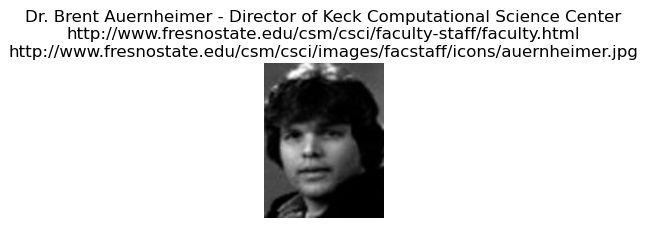

X-Varnish: 12296872
Cache-Control: max-age=120
Content-Type: image/jpeg
Date: Fri, 30 Jun 2017 23:46:50 GMT
Expires: Fri, 30 Jun 2017 23:48:50 GMT
Accept-Ranges: bytes
ETag: "21d8-52b0b1d8d7e00"
Connection: close
Last-Modified: Fri, 05 Feb 2016 19:47:04 GMT
Age: 0
Content-Length: 8664



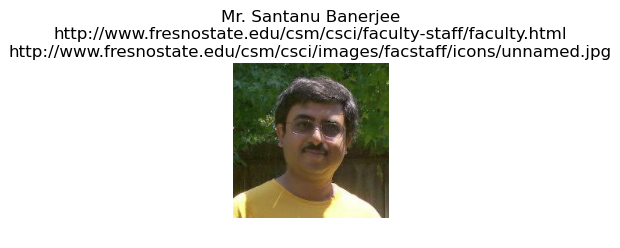

X-Varnish: 12076292
Cache-Control: max-age=120
Content-Type: image/jpeg
Date: Fri, 30 Jun 2017 23:46:50 GMT
Expires: Fri, 30 Jun 2017 23:48:50 GMT
Accept-Ranges: bytes
ETag: "729a-4c88812102cc0"
Connection: close
Last-Modified: Fri, 31 Aug 2012 04:17:31 GMT
X-Cache-Info: caching
Age: 0
Content-Length: 29338



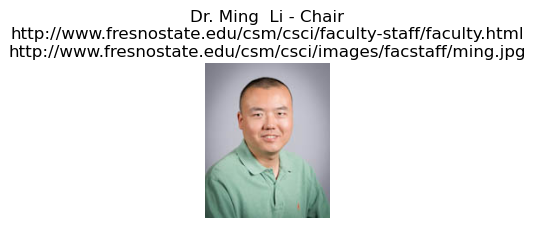

X-Varnish: 11891472
Cache-Control: max-age=120
Content-Type: image/jpeg
Date: Fri, 30 Jun 2017 23:46:50 GMT
Expires: Fri, 30 Jun 2017 23:48:50 GMT
Accept-Ranges: bytes
ETag: "f8e-502d2dbd35080"
Connection: close
Last-Modified: Thu, 11 Sep 2014 23:52:18 GMT
Age: 0
Content-Length: 3982



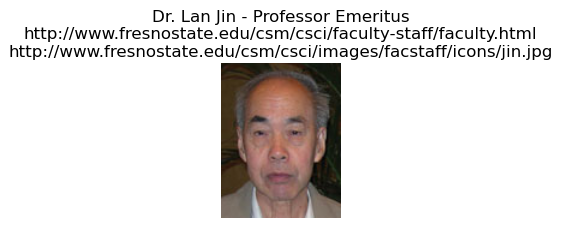

X-Varnish: 14629870
Cache-Control: max-age=120
Content-Type: image/jpeg
Date: Fri, 30 Jun 2017 23:46:50 GMT
Expires: Fri, 30 Jun 2017 23:48:50 GMT
Accept-Ranges: bytes
ETag: "488e-4c6c9587a9f80"
Connection: close
Last-Modified: Wed, 08 Aug 2012 23:19:42 GMT
X-Cache-Info: caching
Age: 0
Content-Length: 18574



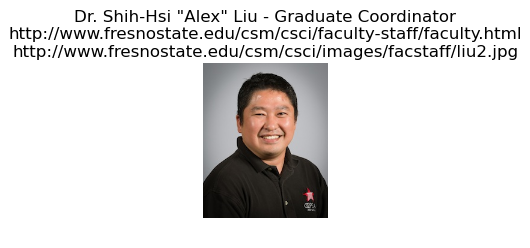

X-Varnish: 15120152
Cache-Control: max-age=120
Content-Type: image/jpeg
Date: Fri, 30 Jun 2017 23:46:50 GMT
Expires: Fri, 30 Jun 2017 23:48:50 GMT
Accept-Ranges: bytes
ETag: "158f-4c24b256bcc40"
Connection: close
Last-Modified: Tue, 12 Jun 2012 19:05:13 GMT
Age: 0
Content-Length: 5519



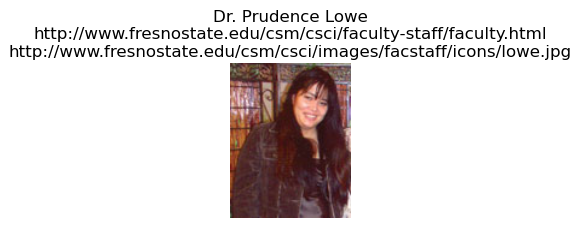

X-Varnish: 14629876
Cache-Control: max-age=120
Content-Type: image/jpeg
Date: Fri, 30 Jun 2017 23:46:51 GMT
Expires: Fri, 30 Jun 2017 23:48:51 GMT
Accept-Ranges: bytes
ETag: "7a79-4d47121d765c0"
Connection: close
Last-Modified: Tue, 29 Jan 2013 17:57:51 GMT
X-Cache-Info: caching
Age: 0
Content-Length: 31353



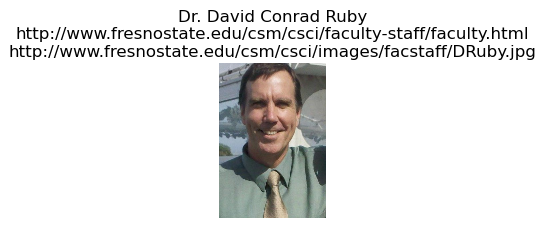

X-Varnish: 15054048 15126485
Cache-Control: max-age=120
Content-Type: image/jpeg
Date: Fri, 30 Jun 2017 23:46:31 GMT
Expires: Fri, 30 Jun 2017 23:48:31 GMT
Accept-Ranges: bytes
ETag: "4517-4e37a1c1cb000"
Connection: close
Last-Modified: Fri, 09 Aug 2013 01:58:24 GMT
Age: 19
Content-Length: 17687



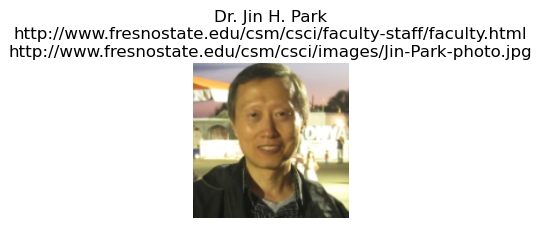

X-Varnish: 14542336
Cache-Control: max-age=120
Content-Type: image/jpeg
Date: Fri, 30 Jun 2017 23:46:51 GMT
Expires: Fri, 30 Jun 2017 23:48:51 GMT
Accept-Ranges: bytes
ETag: "11bf-502d2d3999a00"
Connection: close
Last-Modified: Thu, 11 Sep 2014 23:50:00 GMT
X-Cache-Info: caching
Age: 0
Content-Length: 4543



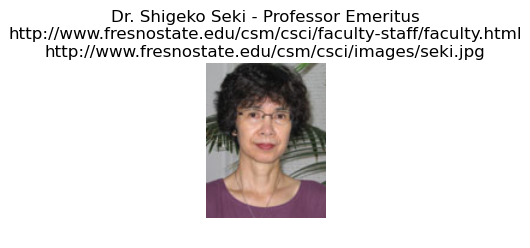

X-Varnish: 14893706 14967526
Cache-Control: max-age=120
Content-Type: image/jpeg
Date: Fri, 30 Jun 2017 23:46:32 GMT
Expires: Fri, 30 Jun 2017 23:48:32 GMT
Accept-Ranges: bytes
ETag: "b080-4c88817aa8040"
Connection: close
Last-Modified: Fri, 31 Aug 2012 04:19:05 GMT
Age: 19
Content-Length: 45184



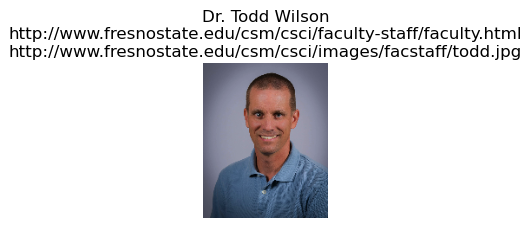

In [32]:
from StringIO import StringIO
from PIL import Image

url='http://www.fresnostate.edu/csm/csci/faculty-staff/faculty.html'
response = urllib2.urlopen(url)
print response.info()
htmlData = response.read()
response.close()  # best practice to close the file

#print "\nPage Data"
d = html.fromstring(htmlData)
#print(etree.tostring(d, encoding='unicode', pretty_print=True))
output = d.xpath('//div[@id="col-right"]/p[1]/strong[1]/text()')
urls = d.xpath('//section[@id="two-col"]')
for u in urls:
    imgUrl= u.xpath('div[@id="col-left"]/p/img/@src')[0]
    name =  u.xpath('div[@id="col-right"]/p[1]/strong[1]/text()')[0]
    if True or name.find("Ruby")!=-1:
        response = urllib2.urlopen('http://www.fresnostate.edu'+u.xpath('div[@id="col-left"]/p/img/@src')[0])
        print response.info()
        htmlData = response.read()
        img = Image.open(StringIO(htmlData))
        fig, ax1 = plt.subplots()
        fig.set_size_inches(2,2)
        imgplot = plt.imshow(img)
        ax1.axis('off')
        plt.title(name +"\n"+url+"\n"+'http://www.fresnostate.edu'+imgUrl)
        plt.show() 